# 0. Preparation

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage import io, color, feature
from scipy import ndimage as ndi

# 1. Proof of Harris Corner Detection

<img src='https://drive.google.com/uc?id=1pAPqfuvc-synP0StE5OUaPElM3BjW4i-'>
<img src='https://drive.google.com/uc?id=1DF1sDwJkSe1-Gk4rqN3_vLNQXbV5rzqo'>
<img src='https://drive.google.com/uc?id=1INoSsmqWS3aMEHsKO796kDFEHbY5udFF'>
<img src='https://drive.google.com/uc?id=1PUPxLtXjfuvUAmOqJDiZVNafvpfxRlMV'>




# 2. Harris Corner Detection from scratch
## step1) Prepare Image

Input Image


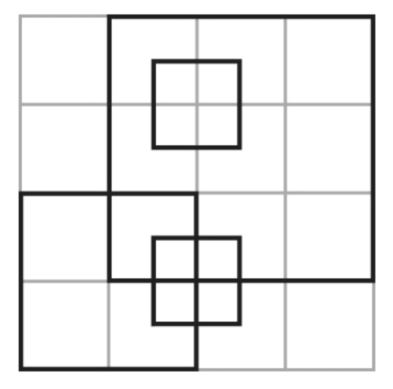

In [23]:
###############################################
# Input Image
###############################################
RGBImage = io.imread('./drive/MyDrive/Computer Vision class/img/boxImage.jpeg')
GrayImage = color.rgb2gray(RGBImage[:,:,:]) # range 0 ~ 1

print('Input Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

## step2) Compute image derivatives: $I_x$, $I_y$
- use x, y Sobel Filter to get derivatives

In [24]:
###############################################
# 3x3 x-axis Sobel filter
###############################################
sobelX = np.array((
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]),
        dtype="float")

Ix = convolve2d(GrayImage, sobelX, 'same')

###############################################
# 3x3 y-axis Sobel filter
###############################################
sobelY = np.array((
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]),
        dtype="float")

Iy = convolve2d(GrayImage, sobelY, 'same')

## step3) Compute M components: ${I_x}^2$, ${I_y}^2$, ${I_x}{I_y}$
<br></br>
$$ M = \sum{w(x,y)} \begin{pmatrix}
{I_x}{I_x} & {I_x}{I_y} \\
{I_x}{I_y} & {I_y}{I_y}
 \end{pmatrix} $$
 <br></br>
 $$w(x,y): Gaussian Kernel$$


In [25]:
Ixx = ndi.gaussian_filter(Ix**2, sigma=1)
Ixy = ndi.gaussian_filter(Iy*Ix, sigma=1)
Iyy = ndi.gaussian_filter(Iy**2, sigma=1)

## step4) Harris Response Calculation
$$Harris Response(C) = det(M) -  \alpha ({trace(M)}^2)$$

Harris Corner Response Image


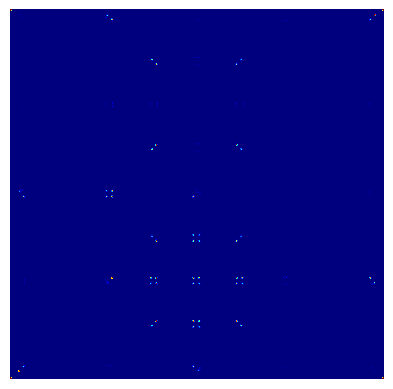

In [46]:
alpha = 0.05

# determinant
detM = Ixx * Iyy - Ixy ** 2
# trace
traceM = Ixx + Iyy

harris_response = detM - alpha * traceM ** 2

print('Harris Corner Response Image')
plt.axis('off')
plt.imshow(harris_response, cmap='jet', vmin=0.0, vmax=1.0)
plt.show()

# step5) Find Edges and Corners

<img src='https://drive.google.com/uc?id=1MsjJA4g9ZjJg1HdHa6fqq00IYiOsIdxL' width=500 height=500>

**set Threshold = 0.1**
- Corner: C > 0
- Edge: C < 0
- Flat: C = 0

Corner Image


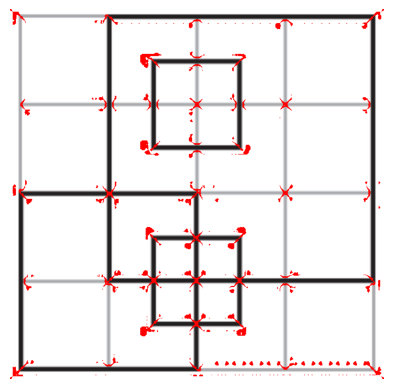

Edge Image


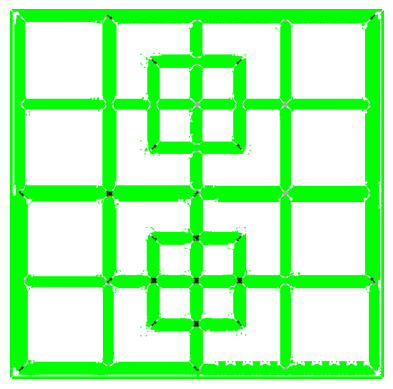

In [28]:
cornerImage = np.copy(RGBImage)
edgeImage = np.copy(RGBImage)

row, col = harris_response.shape
for i in range(row):
  for j in range(col):
    if harris_response[i,j] > 0:
      cornerImage[i,j] = [255,0,0]
    elif harris_response[i,j] < 0:
      edgeImage[i,j] = [0,255,0]

print('Corner Image')
plt.axis('off')
plt.imshow(cornerImage)
plt.show()

print('Edge Image')
plt.axis('off')
plt.imshow(edgeImage)
plt.show()

## step6) Apply non-Maximum Suppression to pick peaks

Corner Image after non-Maximum Suppression


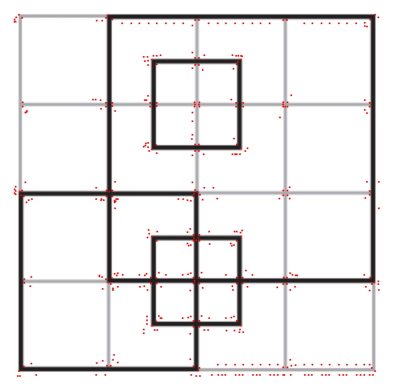

In [38]:
RealCornerImage = np.copy(RGBImage)

row, col = harris_response.shape

for i in range(1, row-1):
  for j in range(1, col-1):
    if (harris_response[i,j] > 0) and (harris_response[i,j] >= harris_response[i-1,j-1]) and (harris_response[i,j] > harris_response[i-1,j]) and\
     (harris_response[i,j] > harris_response[i-1,j+1]) and (harris_response[i,j] > harris_response[i,j-1]) and \
      (harris_response[i,j] > harris_response[i,j+1]) and (harris_response[i,j] > harris_response[i+1,j-1]) and \
       (harris_response[i,j] > harris_response[i+1,j]) and (harris_response[i,j] > harris_response[i+1,j+1]):
       RealCornerImage[i,j] = [255,0,0]
       # to make red dots visible
       RealCornerImage[i-1,j-1] = [255,0,0]
       RealCornerImage[i-1,j] = [255,0,0]
       RealCornerImage[i-1,j+1] = [255,0,0]
       RealCornerImage[i,j-1] = [255,0,0]
       RealCornerImage[i,j+1] = [255,0,0]
       RealCornerImage[i+1,j-1] = [255,0,0]
       RealCornerImage[i+1,j] = [255,0,0]
       RealCornerImage[i+1,j+1] = [255,0,0]

print('Corner Image after non-Maximum Suppression')
plt.axis('off')
plt.imshow(RealCornerImage)
plt.show()

reference: https://github.com/muthuspark/ml_research/blob/master/Process%20of%20Harris%20Corner%20Detection%20Algorithm.ipynb